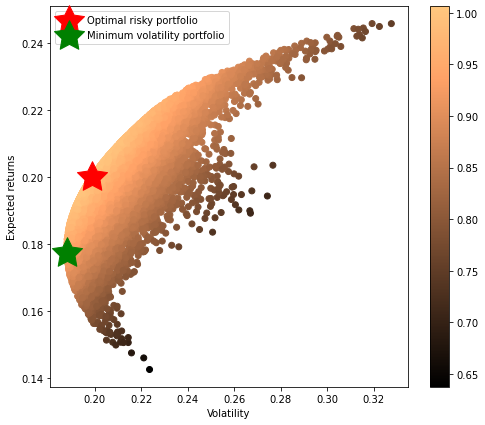

In [5]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import scipy.optimize as sco

stocks = ['KNEBV.HE','UPM.HE','METSA.HE','PON1V.HE']
data = pd.DataFrame()
for stock in stocks:
    data[stock] = web.DataReader(stock, data_source = 'yahoo', start = '2012-1-1')['Adj Close']
num_stocks = len(stocks)

#returns=((data)/data.shift(1))-1
#variance_matrix = returns.cov()*252
#variance_matrix

returns=((data)/data.shift(1))-1
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
results = np.zeros((4+len(stocks)-1,num_portfolios))
for i in range(num_portfolios):
    weights = np.array(np.random.random(4))
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])
optimal_risky_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

plt.subplots(figsize=(8, 7))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='copper')
plt.xlabel('Volatility')
plt.ylabel('Expected returns')
plt.colorbar()
plt.scatter(optimal_risky_port[1],optimal_risky_port[0],marker=(5,1,0),color='r', label='Optimal risky portfolio', s=1000)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',label='Minimum volatility portfolio', s=1000)
plt.legend()


In [7]:
print(optimal_risky_port)

ret         0.200179
stdev       0.198960
sharpe      1.006129
KNEBV.HE    0.225255
UPM.HE      0.243171
METSA.HE    0.269616
PON1V.HE    0.261957
Name: 15099, dtype: float64


In [8]:
print(min_vol_port)

ret         0.177238
stdev       0.187937
sharpe      0.943074
KNEBV.HE    0.475332
UPM.HE      0.142070
METSA.HE    0.135056
PON1V.HE    0.247542
Name: 12319, dtype: float64
